In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/home/ataur/Downloads/Dataset_Assignment Clustering_K Means/crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [21]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.135000
std,4.35551,83.337661,14.474763,9.120419
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,42.825000


In [5]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Cheking Outliers

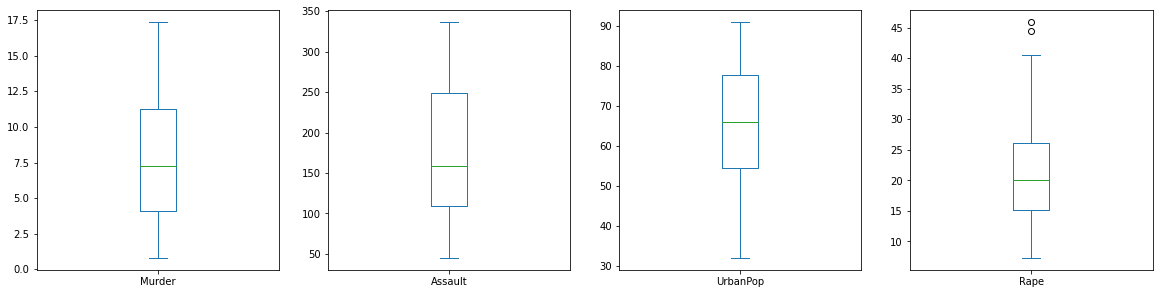

In [7]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,22));

# Outlier Treatment

In [10]:
iqr = df['Rape'].quantile(0.75) - df['Rape'].quantile(0.25)
iqr

11.099999999999996

In [11]:
lower_limit = df['Rape'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1.574999999999994

In [13]:
upper_limit = df['Rape'].quantile(0.75) + 1.5*(iqr)
upper_limit

42.82499999999999

In [16]:
df['Rape'] = np.where(df['Rape'] > upper_limit, upper_limit, np.where(df['Rape'] < lower_limit, lower_limit, df['Rape']))

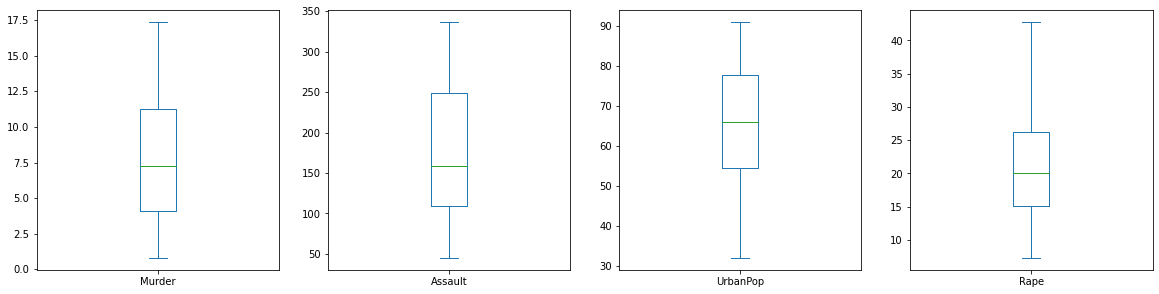

In [17]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,22));

# Normalization

In [18]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [19]:
df_norm = norm_func(df.iloc[:, 1:])

In [22]:
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.389444
std,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.218860
50%,0.388554,0.390411,0.576271,0.360310
75%,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000


# Scree plot

In [24]:
twss = []

In [25]:
k = list(range(2,9))

In [27]:
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    twss.append(kmeans.inertia_)

In [28]:
twss

[6.755182167622326,
 5.134910987938266,
 3.7670908591145245,
 3.260654575572947,
 2.9492328647124455,
 2.650335969083133,
 2.43887973198576]

Text(0, 0.5, 'total_within_ss')

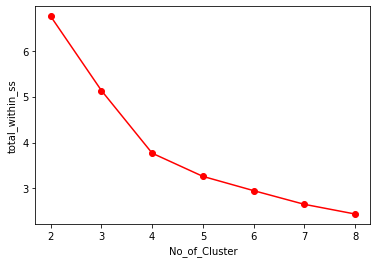

In [29]:
plt.plot(k, twss, 'ro-');plt.xlabel('No_of_Cluster');plt.ylabel('total_within_ss')

# Making fix number of Clusters for data

In [31]:
model = KMeans(n_clusters=3)
model.fit(df_norm)

KMeans(n_clusters=3)

In [32]:
model.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [33]:
x = pd.Series(model.labels_)

In [35]:
df['Clust'] = x

In [37]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.200,1
1,Alaska,10.0,263,48,42.825,1
2,Arizona,8.1,294,80,31.000,1
3,Arkansas,8.8,190,50,19.500,2
4,California,9.0,276,91,40.600,1


In [38]:
df = df.iloc[:, [5,0,1,2,3,4]]

In [39]:
df

,Clust,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,1,Alabama,13.2,236,58,21.200
1,1,Alaska,10.0,263,48,42.825
2,1,Arizona,8.1,294,80,31.000
3,2,Arkansas,8.8,190,50,19.500
4,1,California,9.0,276,91,40.600
5,1,Colorado,7.9,204,78,38.700
6,2,Connecticut,3.3,110,77,11.100
7,2,Delaware,5.9,238,72,15.800
8,1,Florida,15.4,335,80,31.900
9,1,Georgia,17.4,211,60,25.800


In [41]:
df.iloc[:,2:].groupby(df['Clust']).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,2.981818,73.636364,51.181818,11.409091
1,12.165000,255.250000,68.400000,28.922500
2,5.963158,138.052632,70.842105,18.568421


In [42]:
df.iloc[:,2:].groupby(df['Clust']).median()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,2.60,72.0,53.0,11.20
1,12.15,254.5,70.0,27.35
2,6.00,145.0,72.0,18.80
